In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


### CONSTANTS
GM_def = 1.32712440041e20
G = 6.67430e-11
MS2KG = GM_def/G
Mstar = 13.048 #MSOL
Mstar_SI = Mstar*MS2KG
k_B = 1.380649e-23
amu = 1.66053906660e-27
AU2SI = 149597870700.0
RSOL2SI = 6.957e8
YR2S = 365.25*86400
CM32M3 = 1.0e-6
CM22M2 = 1.0e-4
G2KG = 1.0e-3
CODE2MSOL = 13.048
Rgas = 8.314462618
StefBoltz = 5.670374419e-8
c_light = 299792458
Mdotcrit = 3e-8*(MS2KG/YR2S)
m_proton = 1.67262192369e-27 #in kg
m_proton_cgs = m_proton*1e3 #in cgs
cross_thomp = 6.65e-29
cross_thomp_cgs = cross_thomp*1.0e4
#MOLWEIGTH = 1.0 nevim jednotky

### DISC PARAMETERS
Rinnb = 8.7*RSOL2SI
Routnb = 31.5*RSOL2SI
Mdot = 2e-5*(MS2KG/YR2S)
Rstar = 5.987*RSOL2SI
alphae0 = 1.0
alphae1 = 0.1
alphae2 = 0.01
alphae3 = 0.001
alphae4 = 0.0001
Nr = 720

# Functions from QUICKCOMPARISONS

In [77]:
def Omega_K(R):
    result = np.sqrt(G*Mstar_SI/R**3)
    return result

def cs_fromT(T,gamma,MMW):
    return np.sqrt((k_B*T)/(amu*MMW))
    
def T_BROZ2021(R):
    Tnb = 30345 #Kelvins
    etmpnb = -0.73 
    result = Tnb*(R/Rinnb)**(etmpnb) 
    return result

def H(cs, OmegaK,h_cnb):       
    result = h_cnb*cs/(OmegaK)
    return result

################################################

def H_ShakSun(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    h = 1.2e4*alpha**(-1/10)*mdot**(1/5)*m**(9/10)*r**(21/20)*(1-r**(-1/2))**(1/5)
    return h/100.0

def T_ShakSun(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    T = 3.1e8*alpha**(-1/5)*mdot**(2/5)*m**(-1/5)*r**(-9/10)*(1-r**(-1/2))**(2/5)
    return T

def H_ShakSunBrem(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    h = 6.1e3*alpha**(-1/10)*mdot**(3/20)*m**(9/10)*r**(9/8)*(1-r**(-1/2))**(3/20)
    #h = 6.1e3*alpha**(-1/10)*mdot**(3/20)*m**(9/10)*r**(9/8)*(1-r**(-1/2))**(3/20)
    return h/100.0

def T_ShakSunBrem(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    T = 8.6e7*alpha**(-1/5)*mdot**(3/10)*m**(-1/5)*r**(-3/4)*(1-r**(-1/2))**(3/10)
    return T

#def H_ShakSun_Prad(R):
#    r = (1/6)*R*c_light**2/(G*Mstar_SI)
#    m = Mstar_SI/MS2KG
#    mdot = Mdot/(Mdotcrit*m)
#    h = 3.2e6*mdot*m*(1-r**(-1/2))
#    return h/100.0

def H_ShakSun_Prad(R, OpT):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    h = (3./8*np.pi)*(OpT/c_light)*Mdot*(1-r**(-1/2))
    return h/100.0


def T_ShakSun_Prad(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    T = 2.3e7*alpha**(-1/4)*m**(-1/4)*r**(-3/4)
    return T

##############################################

def Op_T(R):
    #when using, think about units.
    nedivnp = 1
    m = m_proton
    cross = cross_thomp*1e4
    return nedivnp*cross/m

def Op_Kram(T,n):
    #When using, think about units.
    sigma_ff = 0.11*T**(-7/2)*n
    return sigma_ff

######################################################

def SIGMA_SHAKSUN(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    result = 1.7e5*alpha**(-4/5)*mdot**(3/5)*m**(1/5)*r**(-3/5)*(1-r**(-1/2))**(3/5)
    return result*(G2KG/CM22M2)


def SIGMA_SHAKSUN_BREM(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    result = 6.1e5*alpha**(-4/5)*mdot**(7/10)*m**(1/5)*r**(-3/4)*(1-r**(-1/2))**(7/10)
    return result*(G2KG/CM22M2)

def SIGMA_SHAKSUN_PRAD(R,alpha):
    r = (1/6)*R*c_light**2/(G*Mstar_SI)
    m = Mstar_SI/MS2KG
    mdot = Mdot/(Mdotcrit*m)
    result = 4.6*alpha**(-1)*mdot**(-1)*r**(3/2)*(1-r**(-1/2))**(-1)
    return result*(G2KG/CM22M2)

def rho_fromSigma_Broz2021(sigma,H_r):
    rho = sigma/(np.sqrt(2*np.pi)*H_r)
    return rho

def rho_fromSigma(sigma,H_r):
    rho = sigma/(2*H_r)
    return rho

#####################################################

def Sigma_BROZ2021(R):
    rhonb = 1.21e-9*(G2KG/CM32M3)
    edensnb = -0.57
    Tinnb = T_BROZ2021(Rinnb)
    csinnb = cs_fromT(Tinnb,gamma_BROZ2021,MMW_BROZ2021)
    OmegaKinnb = Omega_K(Rinnb)
    Hinnb = H(csinnb,OmegaKinnb,h_cnb_BROZ2021)
    sigmanb = rhonb*np.sqrt(2*np.pi)*Hinnb
    result = sigmanb*(R/Rinnb)**edensnb
    return result

def Sigma_static(R):
    rhonb = 1.21e-9*(G2KG/CM32M3)
    edensnb = -0.57
    Tinnb = T_BROZ2021(Rinnb)
    csinnb = cs_fromT(Tinnb,gamma_static,MMW_static)
    OmegaKinnb = Omega_K(Rinnb)
    Hinnb = H(csinnb,OmegaKinnb,h_cnb_static)
    sigmanb = rhonb*np.sqrt(2*np.pi)*Hinnb
    result = sigmanb*(R/Rinnb)**edensnb
    return result


def rho_midplane_BROZ2021(R):
    sigma = Sigma_BROZ2021(R)
    T= T_BROZ2021(R)
    cs = cs_fromT(T,gamma_BROZ2021,MMW_BROZ2021)
    OmegaK = Omega_K(R)
    H_r = H(cs,OmegaK,h_cnb_BROZ2021)
    rho = sigma/(np.sqrt(2*np.pi)*H_r)
    return rho

def rho_midplane_BROZx100(R):
    sigma = Sigma_BROZ2021(R)
    T= T_BROZ2021(R)
    cs = cs_fromT(T,gamma_BROZ2021,MMW_BROZ2021)
    OmegaK = Omega_K(R)
    H_r = H(cs,OmegaK,h_cnb_BROZ2021)
    rho = sigma/(np.sqrt(2*np.pi)*H_r)
    return rho*100

def rho_midplane_static(R):
    sigma = Sigma_static(R)
    T= T_BROZ2021(R)
    cs = cs_fromT(T,gamma_static,MMW_static)
    OmegaK = Omega_K(R)
    H_r = H(cs,OmegaK,h_cnb_static)
    rho = sigma/(np.sqrt(2*np.pi)*H_r)
    return rho

def rho_midplane_staticx100(R):
    sigma = Sigma_static(R)
    T= T_BROZ2021(R)
    cs = cs_fromT(T,gamma_static,MMW_static)
    OmegaK = Omega_K(R)
    H_r = H(cs,OmegaK,h_cnb_static)
    rho = sigma/(np.sqrt(2*np.pi)*H_r)
    return rho*100


###############################

def P_IDG(T,rho,MMW):
    P = T*rho*k_B/(MMW*amu)
    return P

def P_RAD(T):
    P = (4*StefBoltz/(3*c_light))*T**4
    return P

#############################

In [78]:
# C * RHO^A * T^B

A = 1.0
B = -3.5
C = 6*10**(24.0)

In [79]:
# The constants need to be in cgs because, the formulas for profiles result in cgs profiles. 
# This is due to the constant in Kammars opacity. Later in the functions we will do a conversion into SI.

c_light_cgs = c_light*1e2
G_cgs = G*1e3
k_B_cgs = k_B*1e7
Mdot_cgs = Mdot*1e3
Mstar_cgs = Mstar*MS2KG/G2KG
Rstar_cgs = Rstar*1e2
stefanboltzman_cgs = StefBoltz*1e3
amu_cgs = amu*1000.0

#BROZ ET AL. 2021 CLANEK
MMW_BROZ2021 = (45*2+10*4)/(45+10)
gamma_BROZ2021 = 1.0
h_cnb_BROZ2021 = 3.8

#T z BROZ ET AL. 2021 CLANEK, ale zmeneny gamma,MMW,h_cnb
MMW_static = 0.5
gamma_static = 1.4
h_cnb_static = 1.0


###########################################################################


H0 = ((((1.8)/(32*8*stefanboltzman_cgs*np.pi**2*G_cgs**(7./2.)))*(k_B_cgs/(MMW_static*amu_cgs))**4)**(1.0/10.0))
S0 = 1.0/(np.sqrt(G_cgs)*H0**2*3*np.pi)
Rho0 = S0/(2*H0)
T0 = H0**2*MMW_static*amu_cgs*G_cgs/k_B_cgs
K0 = C
print('K0',K0)

D = (3*A-2*B+10)
print('typical denominator',D)

      
Kstar = K0**(10.0/(D))*Rho0**(10.0*A/(D))*T0**(10.0*B/(D))
print('Kstar',Kstar)
Hstar = H0*Kstar**(1.0/10.0)
print('Hstar',Hstar)
Sstar = S0*Kstar**(-1.0/5.0)
print('Sstar',Sstar)
Tstar = T0*Kstar**(1.0/5.0)
print('Tstar',Tstar)

##########################################################################

Kalfaexp = -(7*A+2*B)/D
print('Kalfaexp',Kalfaexp)
Kmdotexp = 4*(A+B)/D
print('Kmdotexp',Kmdotexp)
Kmexp = (11*A+6*B)/(2*D)
print('Kmexp',Kmexp)
KRexp = -3*(11*A+6*B)/(2*D)
print('KRexp',KRexp)
Ksqrtexp = Kmdotexp
print('Ksqrtexp',Ksqrtexp)

Halfaexp = -(7*A+2*B+D)/(10.0*D)
print('Halfaexp',Halfaexp)
Hmdotexp = (2*D+4*(A+B))/(10.0*D) 
print('Hmdotexp',Hmdotexp)
Hmexp = (11*A+6*B-7*D)/(20.0*D)
print('Hmexp',Hmexp)
HRexp = (21*D-(33.0*A+18.0*B))/(20.0*D)
print('HRexp',HRexp)
Hsqrtexp = Hmdotexp
print('Hsqrtexp',Hsqrtexp)

Salfaexp = (7*A+2*B-4*D)/(5*D)
print('Salfaexp',Salfaexp)
Smdotexp = (3*D-4*(A+B))/(5*D)  
print('Smdotexp',Smdotexp)
Smexp = (2*D-(11*A+6*B))/(10.0*D) 
print('Smexp',Smexp)
SRexp = 3*(11*A+6*B-2*D)/(10*D) 
print('SRexp',SRexp)
Ssqrtexp = Smdotexp 
print('Ssqrtexp',Ssqrtexp)

Talfaexp = -(7*A+2*B+D)/(5*D) 
print('Talfaexp',Talfaexp)
Tmdotexp = (2*D+4*(A+B))/(5.0*D)
print('Tmdotexp',Tmdotexp)
Tmexp = (3*D+11*A+6*B)/(10*D)
print('Tmexp',Tmexp)
TRexp = -3*(11*A+6*B+3*D)/(10*D)
print('TRexp',TRexp)
Tsqrtexp = Tmdotexp
print('Tsqrtexp',Tsqrtexp)



K0 6e+24
typical denominator 20.0
Kstar 87206138968.70538
Hstar 10087196.492652293
Sstar 4.03631497641304e-12
Tstar 0.04083969633392768
Kalfaexp -0.0
Kmdotexp -0.5
Kmexp -0.25
KRexp 0.75
Ksqrtexp -0.5
Halfaexp -0.1
Hmdotexp 0.15
Hmexp -0.375
HRexp 1.125
Hsqrtexp 0.15
Salfaexp -0.8
Smdotexp 0.7
Smexp 0.25
SRexp -0.75
Ssqrtexp 0.7
Talfaexp -0.2
Tmdotexp 0.3
Tmexp 0.25
TRexp -0.75
Tsqrtexp 0.3


In [80]:
def Opacity(R,alpha):
    #input and output in SI
    r = R*1e2
    Kappa = Kstar*alpha**(Kalfaexp)*Mdot_cgs**(Kmdotexp)*Mstar_cgs**(Kmexp)*r**(KRexp)*(1-np.sqrt(Rstar_cgs/r))**(Ksqrtexp)
    return Kappa/10

def T_new(R,alpha):
    #input and output in SI
    r = R*1e2
    T = Tstar*alpha**(Talfaexp)*Mdot_cgs**(Tmdotexp)*Mstar_cgs**(Tmexp)*r**(TRexp)*(1-np.sqrt(Rstar_cgs/r))**(Tsqrtexp)
    return T

def Sigma_new(R,alpha):
    r = R*1e2
    sigma = Sstar*alpha**(Salfaexp)*Mdot_cgs**(Smdotexp)*Mstar_cgs**(Smexp)*r**(SRexp)*(1-np.sqrt(Rstar_cgs/r))**(Ssqrtexp)
    return sigma*10 

def H_new(R,alpha):
    r = R*1e2
    H = Hstar*alpha**(Halfaexp)*Mdot_cgs**(Hmdotexp)*Mstar_cgs**(Hmexp)*r**(HRexp)*(1-np.sqrt(Rstar_cgs/r))**(Hsqrtexp)
    return H/100

##############################


def Opacity_param(T,rho):
    rho_cgs =  rho/1000
    return (K0*T**(B)*rho_cgs**A)/10


In [81]:
rr = np.linspace(Rinnb,Routnb,200)

#X = Rinnb + (Routnb - Rinnb)*10/720

Op_alphae0 = list(map(lambda x: Opacity(x,alphae0)*10,rr))
Op_alphae1 = list(map(lambda x: Opacity(x,alphae1)*10,rr))
Op_alphae2 = list(map(lambda x: Opacity(x,alphae2)*10,rr))
Op_alphae3 = list(map(lambda x: Opacity(x,alphae3)*10,rr))
Op_alphae4 = list(map(lambda x: Opacity(x,alphae4)*10,rr))


TNew_alphae0 = list(map(lambda x: T_new(x,alphae0),rr))
TNew_alphae1 = list(map(lambda x: T_new(x,alphae1),rr))
TNew_alphae2 = list(map(lambda x: T_new(x,alphae2),rr))
TNew_alphae3 = list(map(lambda x: T_new(x,alphae3),rr))
TNew_alphae4 = list(map(lambda x: T_new(x,alphae4),rr))


SigNew_alphae0 = list(map(lambda x: Sigma_new(x,alphae0),rr))
SigNew_alphae1 = list(map(lambda x: Sigma_new(x,alphae1),rr))
SigNew_alphae2 = list(map(lambda x: Sigma_new(x,alphae2),rr))
SigNew_alphae3 = list(map(lambda x: Sigma_new(x,alphae3),rr))
SigNew_alphae4 = list(map(lambda x: Sigma_new(x,alphae4),rr))


HNew_alphae0 = list(map(lambda x: H_new(x,alphae0)/AU2SI,rr))
HNew_alphae1 = list(map(lambda x: H_new(x,alphae1)/AU2SI,rr))
HNew_alphae2 = list(map(lambda x: H_new(x,alphae2)/AU2SI,rr))
HNew_alphae3 = list(map(lambda x: H_new(x,alphae3)/AU2SI,rr))
HNew_alphae4 = list(map(lambda x: H_new(x,alphae4)/AU2SI,rr))


RhoNew_alpha0 = list(map(lambda x,y: rho_fromSigma(x,y*AU2SI),SigNew_alphae0,HNew_alphae0))
RhoNew_alpha1 = list(map(lambda x,y: rho_fromSigma(x,y*AU2SI),SigNew_alphae1,HNew_alphae1))
RhoNew_alpha2 = list(map(lambda x,y: rho_fromSigma(x,y*AU2SI),SigNew_alphae2,HNew_alphae2))
RhoNew_alpha3 = list(map(lambda x,y: rho_fromSigma(x,y*AU2SI),SigNew_alphae3,HNew_alphae3))
RhoNew_alpha4 = list(map(lambda x,y: rho_fromSigma(x,y*AU2SI),SigNew_alphae4,HNew_alphae4))


Pg_alphae0 = list(map(lambda x,y: P_IDG(x,y,MMW_static),TNew_alphae0,RhoNew_alpha0))
Pg_alphae1 = list(map(lambda x,y: P_IDG(x,y,MMW_static),TNew_alphae1,RhoNew_alpha1))
Pg_alphae2 = list(map(lambda x,y: P_IDG(x,y,MMW_static),TNew_alphae2,RhoNew_alpha2))
Pg_alphae3 = list(map(lambda x,y: P_IDG(x,y,MMW_static),TNew_alphae3,RhoNew_alpha3))
Pg_alphae4 = list(map(lambda x,y: P_IDG(x,y,MMW_static),TNew_alphae4,RhoNew_alpha4))


Pr_alphae0 = list(map(lambda x: P_RAD(x),TNew_alphae0))
Pr_alphae1 = list(map(lambda x: P_RAD(x),TNew_alphae1))
Pr_alphae2 = list(map(lambda x: P_RAD(x),TNew_alphae2))
Pr_alphae3 = list(map(lambda x: P_RAD(x),TNew_alphae3))
Pr_alphae4 = list(map(lambda x: P_RAD(x),TNew_alphae4))

In [82]:
###########################################
Tbroz_rr = list(map(T_BROZ2021,rr))
OmegaK = list(map(Omega_K,rr))
rho_broz2021 = list(map(rho_midplane_BROZ2021,rr))
Sigma_Broz2021 = list(map(Sigma_BROZ2021,rr))
cs_BROZ2021 = list(map(lambda x : cs_fromT(x,gamma_BROZ2021,MMW_BROZ2021),Tbroz_rr))
H_BROZ2021 = list(map(lambda x,y: H(x,y,h_cnb_BROZ2021),cs_BROZ2021,OmegaK))
n_Broz2021 = list(map(lambda x,y: x/(np.sqrt(2*np.pi)*y*m_proton_cgs*1e-3),Sigma_Broz2021,H_BROZ2021))
#n_Broz2021 = list(map(lambda x: x/m_proton,rho_broz2021))

OpKram_BROZ2021 = list(map(lambda x,y: 1.1*Op_Kram(x,y*1e-6),Tbroz_rr,n_Broz2021))
Opacity_broz2021 = list(map(lambda x,y: Opacity_param(x,y)*10,Tbroz_rr,rho_broz2021))
Pr_broz2021 = list(map(P_RAD,Tbroz_rr))
Pg_broz2021 = list(map(lambda x,y: P_IDG(x,y,MMW_BROZ2021),Tbroz_rr,rho_broz2021))
############################################
rho_x100 = list(map(rho_midplane_BROZx100,rr))
Opacity_x100 = list(map(lambda x,y: Opacity_param(x,y)*10,Tbroz_rr,rho_x100))
Sigma_x100 = list(map(lambda x,y: np.sqrt(2*np.pi)*x*y,rho_x100,H_BROZ2021))
Pg_x100 = list(map(lambda x,y: P_IDG(x,y,MMW_BROZ2021),Tbroz_rr,rho_x100))

In [83]:
############################################
cs_static = list(map(lambda x : cs_fromT(x,gamma_static,MMW_static),Tbroz_rr))
H_static = list(map(lambda x,y: H(x,y,h_cnb_static),cs_static,OmegaK))
sigma_static = list(map(Sigma_static,rr))
rho_static = list(map(rho_midplane_static,rr))
#rho_static = list(map(lambda x,y: x/(np.sqrt(2*np.pi)*y),S  ))
#rho_static = list(map(rho_midplane_static,rr))

Opacity_static = list(map(lambda x,y: Opacity_param(x,y)*10,Tbroz_rr,rho_static))
Pg_static = list(map(lambda x,y: P_IDG(x,y,MMW_static),Tbroz_rr,rho_static))
############################################

In [84]:
rho_staticx100 = list(map(lambda x: rho_midplane_staticx100(x),rr))
Opacity_staticx100 = list(map(lambda x,y: Opacity_param(x,y)*10,Tbroz_rr,rho_staticx100))
sigma_staticx100 = list(map(lambda x,y: np.sqrt(2*np.pi)*x*y,rho_staticx100,H_static))
Pg_staticx100 = list(map(lambda x,y: P_IDG(x,y,MMW_static),Tbroz_rr,rho_staticx100))

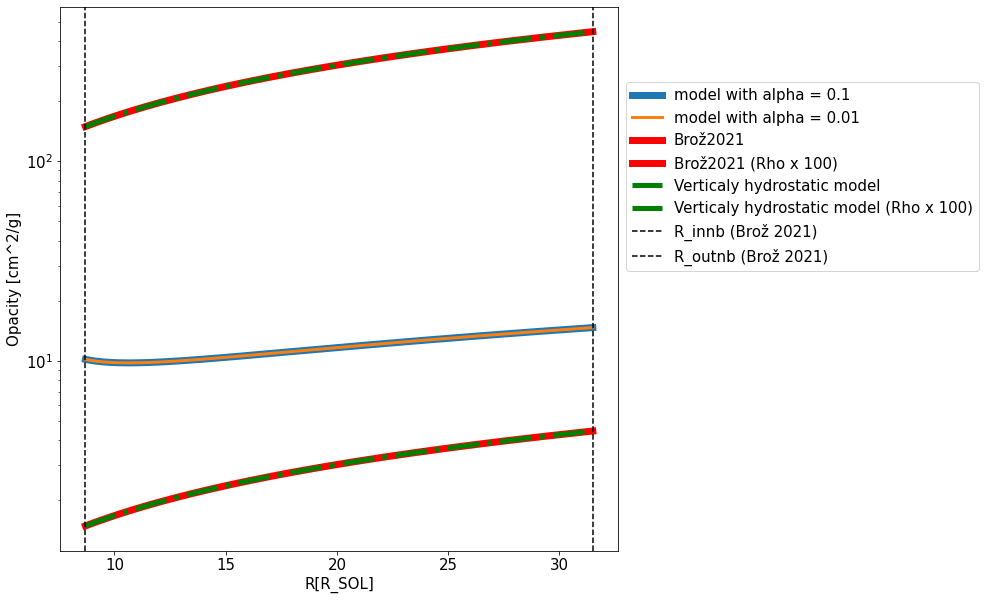

In [85]:
plt.rcParams['figure.figsize'] = [10, 10]
#plt.plot(rr/RSOL2SI, Op_alphae0, label = 'model with alpha = 1.0')
plt.plot(rr/RSOL2SI, Op_alphae1, label = 'model with alpha = 0.1',lw=7)
plt.plot(rr/RSOL2SI, Op_alphae2,label = 'model with alpha = 0.01',lw=3 )
#plt.plot(rr/RSOL2SI, Op_alphae3, label = 'model with alpha = 0.001')

plt.plot(rr/RSOL2SI,Opacity_broz2021, label = 'Brož2021', lw = 7, ls = '-', c = 'r')
plt.plot(rr/RSOL2SI,Opacity_x100, label = 'Brož2021 (Rho x 100)', lw = 7, ls = '-', c = 'r')
plt.plot(rr/RSOL2SI,Opacity_static, label = 'Verticaly hydrostatic model', lw = 5, ls = '-.', c = 'g')
plt.plot(rr/RSOL2SI,Opacity_staticx100, label = 'Verticaly hydrostatic model (Rho x 100)', lw = 5, ls = '-.', c = 'g')



plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb (Brož 2021)')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb (Brož 2021)')

lgd = plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xlabel("R[R_SOL]",fontsize=15)
plt.ylabel("Opacity [cm^2/g]",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('OKPgas_KrammerModel_Opacity.pdf', bbox_extra_artists=[lgd,], bbox_inches='tight')

#print(OKOpacity_x100,Opacity_staticx100)

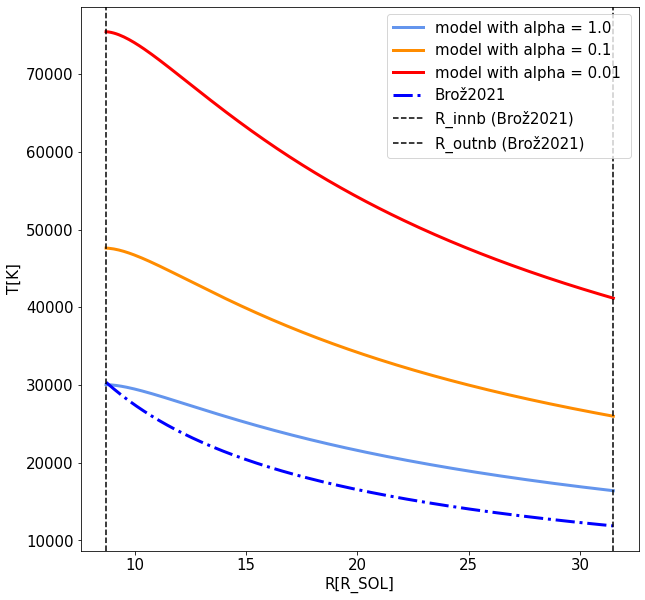

In [86]:
plt.rcParams['figure.figsize'] = [10, 10]


plt.plot(rr/RSOL2SI, TNew_alphae0, label = 'model with alpha = 1.0', lw = 3, c = "cornflowerblue")
plt.plot(rr/RSOL2SI, TNew_alphae1, label = 'model with alpha = 0.1', lw = 3, c = "darkorange")
plt.plot(rr/RSOL2SI, TNew_alphae2, label = 'model with alpha = 0.01 ', lw = 3, c = "r")
#plt.plot(rr/RSOL2SI, TNew_alphae3, label  = 'model with alpha = 0.001 (out of regime!)', ls = 'dotted',c = 'gray', marker = 'x', ms = 10, mfc = 'black', mec = 'black')
#plt.plot(rr/RSOL2SI, TNew_alphae3, label  = 'model with alpha = 0.001', lw = 3,c = 'r')
#plt.plot(rr/RSOL2SI, TNew_alphae4, label  = 'model with alpha = 0.0001', lw = 3)

plt.plot(rr/RSOL2SI,Tbroz_rr,label = "Brož2021", color="b", lw =3, ls = "-.")

f = open('Broz2021_data_TEMP.txt','w')
f.writelines( "%s\n" % item for item in Tbroz_rr)
f.close()

#Tshaksun_brem_alphae1 = list(map(lambda x: T_ShakSunBrem(x,alphae1),rr))
#plt.plot(rr/RSOL2SI,Tshaksun_thomp_alphae1,label = "T S&S 1973 (model; P_g, Thompson scatt.,alpha=0.1)",c = 'r',ls = "-.")
#diff = list(map(lambda x,y: x/y,Tshaksun_brem_alphae1,TNew_alphae1))

plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb (Brož2021)')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb (Brož2021)')

plt.legend(fontsize=15)
plt.xlabel("R[R_SOL]",fontsize=15)
plt.ylabel("T[K]",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('OKPgas_KrammerModel_Temperatur.pdf')

#plt.plot(rr/RSOL2SI,diff)

27937.393398110613


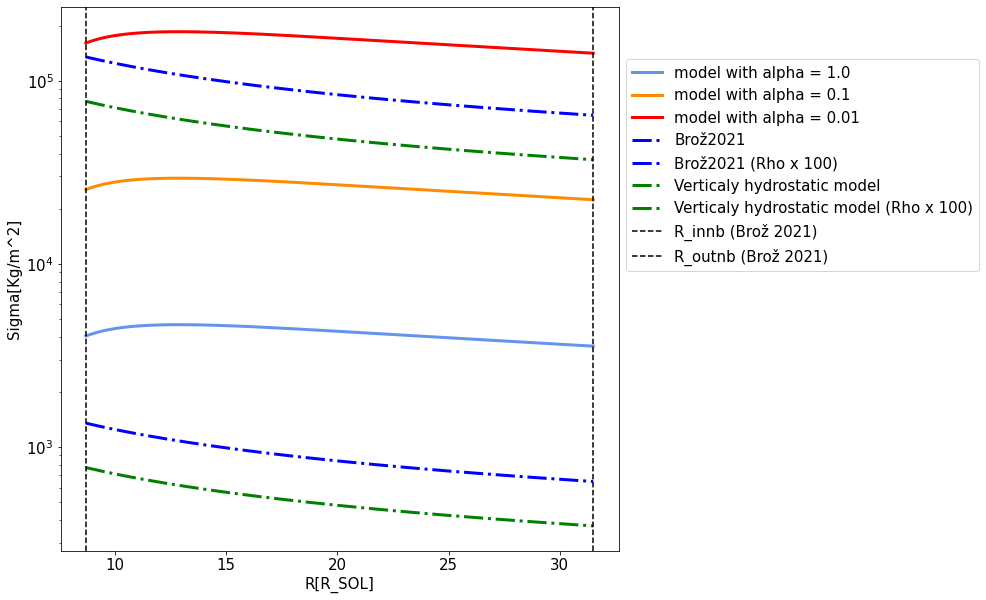

In [87]:
plt.rcParams['figure.figsize'] = [10, 10]


f = open('Broz2021_data_GASDENS.txt','w')
f.writelines( "%s\n" % item for item in Sigma_Broz2021)
f.close()

f = open('VertStatM_data_GASDENS.txt','w')
f.writelines( "%s\n" % item for item in sigma_static)
f.close()

f = open('Broz2021_data_GASDENSx100.txt','w')
f.writelines( "%s\n" % item for item in Sigma_x100)
f.close()

f = open('VertStatM_data_GASDENSx100.txt','w')
f.writelines( "%s\n" % item for item in sigma_staticx100)
f.close()


plt.plot(rr/RSOL2SI,SigNew_alphae0, label = 'model with alpha = 1.0', lw = 3, c = "cornflowerblue")
plt.plot(rr/RSOL2SI,SigNew_alphae1,label = 'model with alpha = 0.1', lw = 3, c = "darkorange")
plt.plot(rr/RSOL2SI,SigNew_alphae2, label = 'model with alpha = 0.01', lw = 3, c = "r")
#plt.plot(rr/RSOL2SI,SigNew_alphae3,label = 'model with alpha = 0.001', c = 'r',lw = 3)

plt.plot(rr/RSOL2SI,Sigma_Broz2021,label = "Brož2021", lw =3, ls = "-.", c = 'b')
plt.plot(rr/RSOL2SI,Sigma_x100,label = "Brož2021 (Rho x 100)", lw =3, ls = "-.", c = 'b')
plt.plot(rr/RSOL2SI,sigma_static,label = "Verticaly hydrostatic model", lw =3, ls = "-.", c = 'g')
plt.plot(rr/RSOL2SI,sigma_staticx100,label = "Verticaly hydrostatic model (Rho x 100)", lw =3, ls = "-.", c = 'g')
#plt.plot(rr/RSOL2SI,Sigma_static,label = "Sigma Static 2021", color="b", lw =3, ls = "-.")

#print(Sigma_new(1*AU2SI,0.1))


plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb (Brož 2021)')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb (Brož 2021)')

lgd = plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))
plt.xlabel("R[R_SOL]",fontsize=15)
plt.ylabel("Sigma[Kg/m^2]",fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('OKPgas_KrammerModel_Sigma.pdf',bbox_extra_artists=[lgd,], bbox_inches='tight')
print(Sigma_new(10*RSOL2SI,0.1))

0.09966437059553239
1.74774580091482


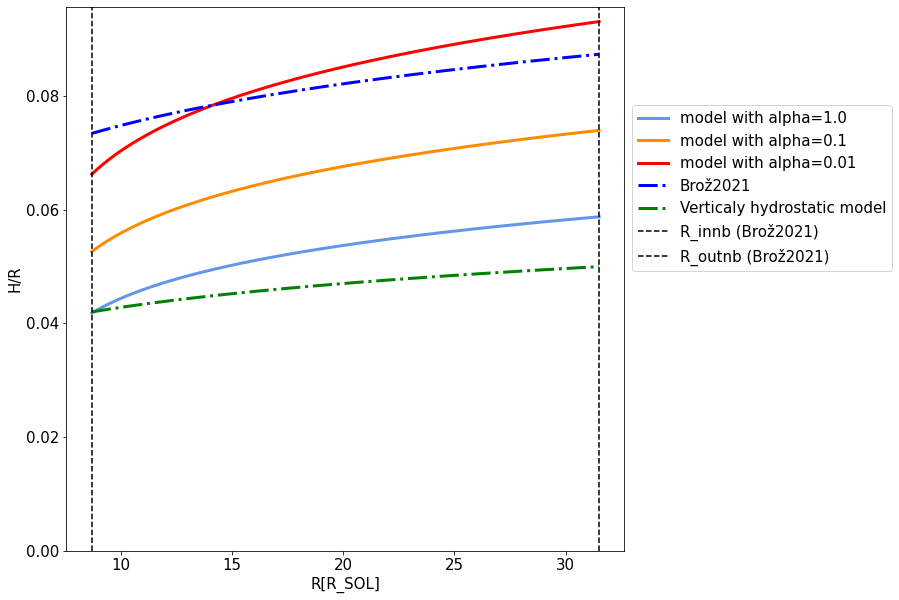

In [88]:
plt.rcParams['figure.figsize'] = [10, 10]

H_BROZ2021_AU = list(map(lambda x: x/AU2SI, H_BROZ2021))
H_static_AU = list(map(lambda x: x/AU2SI, H_static))

f = open('Broz2021_data_ASPECT.text','w')
f.writelines( "%s\n" % item for item in H_BROZ2021)
f.close()

f = open('VertStatM_data_ASPECT.text','w')
f.writelines( "%s\n" % item for item in H_static)
f.close()


print(H_new(1*AU2SI,0.1)/AU2SI)
print(H_BROZ2021_AU[20]/H_static_AU[20])

plt.plot(rr/RSOL2SI,HNew_alphae0/(rr/AU2SI),label = "model with alpha=1.0", lw =3, c = "cornflowerblue")
plt.plot(rr/RSOL2SI,HNew_alphae1/(rr/AU2SI),label = "model with alpha=0.1", lw =3, c = "darkorange")
plt.plot(rr/RSOL2SI,HNew_alphae2/(rr/AU2SI),label = "model with alpha=0.01", lw =3, c = "r")
#plt.plot(rr/RSOL2SI,HNew_alphae3/(rr/AU2SI),label = "model with alpha=0.001", c = 'r', lw =3)

plt.plot(rr/RSOL2SI,H_BROZ2021_AU/(rr/AU2SI),label = "Brož2021", lw = 3, ls = "-.", c = 'b')
plt.plot(rr/RSOL2SI,H_static_AU/(rr/AU2SI),label = "Verticaly hydrostatic model", lw = 3, ls = "-.", c = 'g')

plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb (Brož2021)')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb (Brož2021)')
#plt.axvline(x =X/RSOL2SI,linestyle='--',color = "black",label = 'check')


lgd = plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))
plt.xlabel("R[R_SOL]",fontsize=15)
plt.ylabel("H/R",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(ymin=0)  # this line


plt.savefig('OKPgas_KrammerModel_AspectRatio.pdf',bbox_extra_artists=[lgd,], bbox_inches='tight')

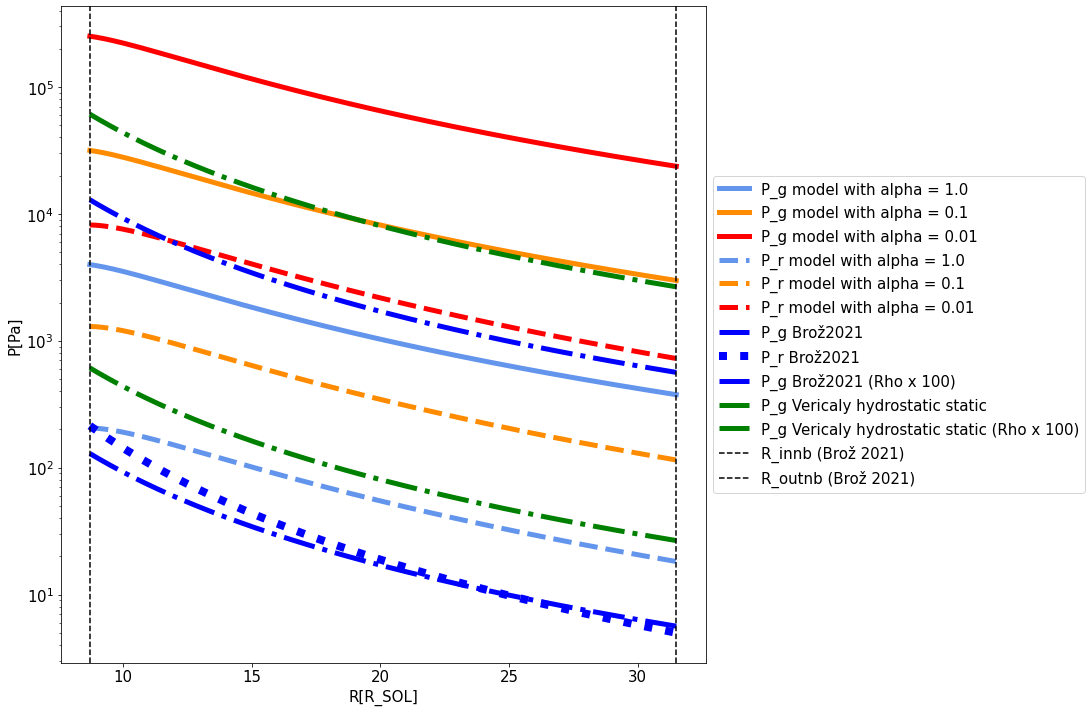

In [89]:
plt.plot(rr/RSOL2SI,Pg_alphae0,label ='P_g model with alpha = 1.0', lw = 5,color='cornflowerblue')
plt.plot(rr/RSOL2SI,Pg_alphae1,label ='P_g model with alpha = 0.1', c = 'darkorange', lw = 5)
plt.plot(rr/RSOL2SI,Pg_alphae2,label ='P_g model with alpha = 0.01', color="r", lw = 5)
#plt.plot(rr/RSOL2SI,Pg_alphae3,label ='P_g model with alpha = 0.001',c = 'r', lw = 5)

plt.plot(rr/RSOL2SI,Pr_alphae0,label ='P_r model with alpha = 1.0', lw = 5,color="cornflowerblue", ls = '--')
plt.plot(rr/RSOL2SI,Pr_alphae1,label ='P_r model with alpha = 0.1', ls = '--',lw = 5, color="darkorange")
plt.plot(rr/RSOL2SI,Pr_alphae2,label ='P_r model with alpha = 0.01', ls = '--',lw = 5,color="r")
#plt.plot(rr/RSOL2SI,Pr_alphae3,label ='P_r model with alpha = 0.001', ls = '--',lw = 5, color="r")



plt.plot(rr/RSOL2SI,Pg_broz2021,label = "P_g Brož2021", color="b", lw =5, ls = "-.")
plt.plot(rr/RSOL2SI,Pr_broz2021,label = "P_r Brož2021", color="b", lw = 8, ls = ":")
plt.plot(rr/RSOL2SI,Pg_x100,label = "P_g Brož2021 (Rho x 100)", color="b", lw =5, ls = "-.")
plt.plot(rr/RSOL2SI,Pg_static,label = "P_g Vericaly hydrostatic static", color="g", lw =5, ls = "-.")
plt.plot(rr/RSOL2SI,Pg_staticx100,label = "P_g Vericaly hydrostatic static (Rho x 100)", color="g", lw =5, ls = "-.")





plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb (Brož 2021)')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb (Brož 2021)')

plt.xlabel("R[R_SOL]",fontsize=15)
plt.ylabel("P[Pa]",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale("log")
plt.tight_layout()
lgd = plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('OKPgas_KrammerModel_Pressure.pdf',bbox_extra_artists=[lgd,], bbox_inches='tight')

0.09966437059553239


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

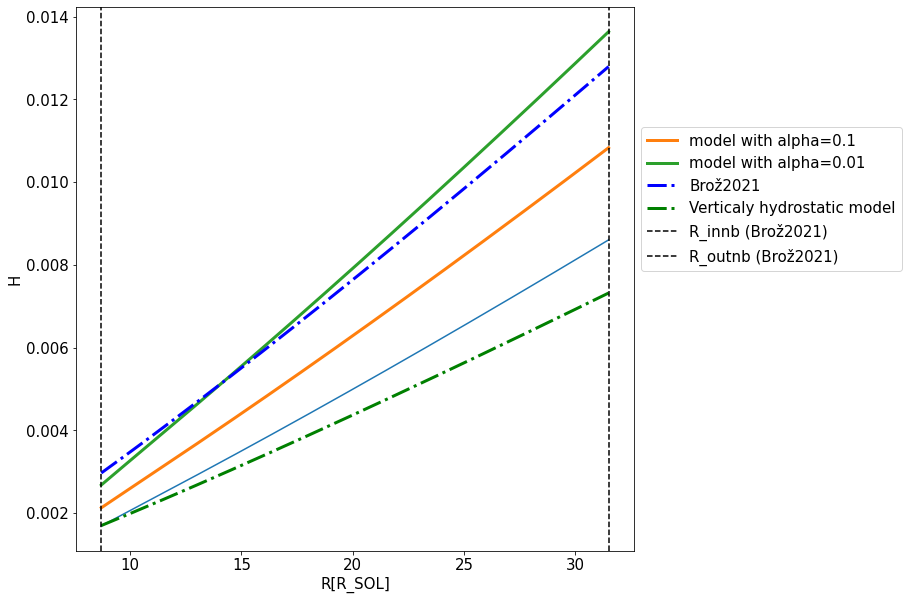

In [90]:
plt.rcParams['figure.figsize'] = [10, 10]

H_BROZ2021_AU = list(map(lambda x: x/AU2SI, H_BROZ2021))
H_static_AU = list(map(lambda x: x/AU2SI, H_static))


print(H_new(1*AU2SI,0.1)/AU2SI)

plt.plot(rr/RSOL2SI,HNew_alphae0)
plt.plot(rr/RSOL2SI,HNew_alphae1,label = "model with alpha=0.1", lw =3)
plt.plot(rr/RSOL2SI,HNew_alphae2,label = "model with alpha=0.01", lw =3)
#plt.plot(rr/RSOL2SI,HNew_alphae3/(rr/AU2SI), label ='e3')

plt.plot(rr/RSOL2SI,H_BROZ2021_AU,label = "Brož2021", lw = 3, ls = "-.", c = 'b')
plt.plot(rr/RSOL2SI,H_static_AU,label = "Verticaly hydrostatic model", lw = 3, ls = "-.", c = 'g')

plt.axvline(x = Rinnb/RSOL2SI,linestyle='--',color = "black",label = 'R_innb (Brož2021)')
plt.axvline(x = Routnb/RSOL2SI,linestyle='--',color = "black",label = 'R_outnb (Brož2021)')

lgd = plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))
plt.xlabel("R[R_SOL]",fontsize=15)
plt.ylabel("H",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

### All sorts of random calculations.

In [91]:
8.6e7*(c_light_cgs**2/(6*G_cgs))**(-3/4)*(MS2KG*1000/(3e-8*(MS2KG/YR2S)))**(3/10)*(1/(MS2KG*1000))**(-1/5)

0.3072423818056207

In [92]:
X= 21411820456.228305816650390625

alpha_loc = 1.0

T_x = T_new(X,alpha_loc)
print("T=",T_new(X,alpha_loc))
print("H=",H_new(X,alpha_loc)/AU2SI)
Sigma_x = Sigma_new(X,alpha_loc)
print("Sigma=",Sigma_x)
print("cs=",cs_fromT(T_new(X,alpha_loc),gamma_static,MMW_static))
print("rho=",Sigma_new(X,alpha_loc)/(2*H_new(X,alpha_loc)))
print("kappa=",Opacity(X,alpha_loc)*10)
print("alpha=",alpha_loc)
print("Mdot=",Mdot*YR2S/MS2KG)
print("omega_inv=",1/Omega_K(X))
viscosity_x = 0.1*cs_fromT(T_new(X,alpha_loc),gamma_static,MMW_static)**2/Omega_K(X)
print("viscoscity=",viscosity_x)
print("DELTAviscoscity=", alpha_loc*H_new(X,alpha_loc)*cs_fromT(T_new(X,alpha_loc),gamma_static,MMW_static)/536393558119.6358)
print("Rstar=",Rstar)
taueff_x = (0.9/8.)*Opacity(X,alpha_loc)*Sigma_new(X,alpha_loc)
print("taueff=",taueff_x)
omega2_x = Omega_K(X)**2
print("omega2=",omega2_x)
print("StefBoltz=",StefBoltz)


T= 16632.05855639536
H= 0.008370131470455087
Sigma= 3588.973008898568
cs= 16630.491825431614
rho= 1.433119828651151e-06
kappa= 14.491813510210969
alpha= 1.0
Mdot= 2e-05
omega_inv= 75292.65271303206
viscoscity= 2082393429109.1008
DELTAviscoscity= 38.822118528214105
Rstar= 4165155900.0
taueff= 585.1206848040613
omega2= 1.7639846556751662e-10
StefBoltz= 5.670374419e-08


In [93]:
np.sqrt(2/np.pi)

0.7978845608028654

In [94]:
1.32712440041*13.048

17.31631917654968

In [95]:
T1 = (9.0*Sigma_x*viscosity_x*omega2_x*taueff_x/(16.0*StefBoltz))**(0.25)
print(T1)

9352.893849246824


In [96]:
qplus = 3*G*Mstar_SI*Mdot*(1-np.sqrt(Rstar/X))/(8*np.pi*X**3)
qminus = 2*StefBoltz*T_x**4/taueff_x
print(qplus)
print(qminus)

14831336.974947196
14831336.974947324
